In [158]:
# package for data manipulation
import numpy as np
import pandas as pd
from pandas import Grouper
from matplotlib import pyplot

#package for time
from dateparser.search import search_dates
import datetime

from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import register_matplotlib_converters , autocorrelation_plot
register_matplotlib_converters()

import warnings
warnings.filterwarnings('ignore')

In [137]:
vix_data = pd.read_csv('ALL_VIX.csv', parse_dates=True)
vix_data = vix_data[['Date', 'Close']]

In [138]:
vix_data

,Date,Close
0,1990-01-02,17.240000
1,1990-01-03,18.190001
2,1990-01-04,19.219999
3,1990-01-05,20.110001
4,1990-01-08,20.260000
...,...,...
7662,2020-06-01,28.230000
7663,2020-06-02,26.840000
7664,2020-06-03,25.660000
7665,2020-06-04,25.809999


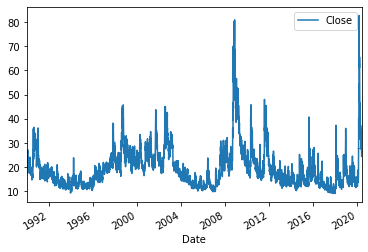

In [140]:
vix_data.set_index('Date', inplace=True)
vix_data.index = pd.to_datetime(vix_data.index)
vix_data.plot()

In [145]:
# groups = vix_data.groupby(Grouper(freq='A'))
# years = pd.DataFrame()
# for name, group in groups:
#     years[name.year] = group.values
#     print(years)
# years.plot(subplots=True, legend=False)
# pyplot.show()

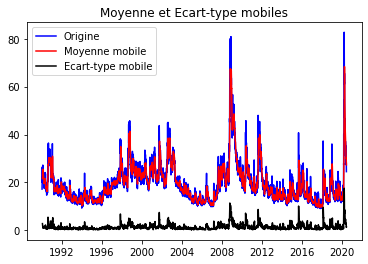

In [62]:
rolling_mean = vix_data.rolling(window = 12).mean()
rolling_std = vix_data.rolling(window = 12).std()
plt.plot(vix_data, color = 'blue', label = 'Origine')
plt.plot(rolling_mean, color = 'red', label = 'Moyenne mobile')
plt.plot(rolling_std, color = 'black', label = 'Ecart-type mobile')
plt.legend(loc = 'best')
plt.title('Moyenne et Ecart-type mobiles')
plt.show()

In [60]:
result = adfuller(vix_data['Close'])
 
print('Statistiques ADF : {}'.format(result[0]))
print('p-value : {}'.format(result[1]))
print('Valeurs Critiques :')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

Statistiques ADF : -6.268589414881563
p-value : 4.056382900115921e-08
Valeurs Critiques :
	1%: -3.4312045387551517
	5%: -2.8619176425585677
	10%: -2.5669710146243903


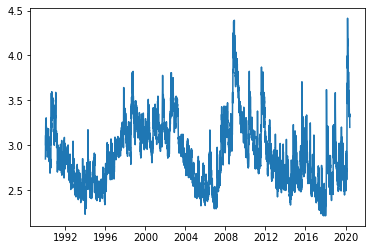

In [61]:
vix_data_log = np.log(vix_data)
plt.plot(vix_data_log)

In [70]:
def get_stationarity(timeseries):
    
    # Statistiques mobiles
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # tracé statistiques mobiles
    original = plt.plot(timeseries, color='blue', label='Origine')
    mean = plt.plot(rolling_mean, color='red', label='Moyenne Mobile')
    std = plt.plot(rolling_std, color='black', label='Ecart-type Mobile')
    plt.legend(loc='best')
    plt.title('Moyenne et écart-type Mobiles')
    plt.show(block=False)
    
    # Test Dickey–Fuller :
    result = adfuller(timeseries['Close'])
    print('Statistiques ADF : {}'.format(result[0]))
    print('p-value : {}'.format(result[1]))
    print('Valeurs Critiques :')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

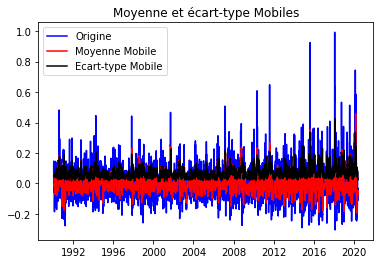

Statistiques ADF : -21.680679665412335
p-value : 0.0
Valeurs Critiques :
	1%: -3.4312058808867993
	5%: -2.861918235595498
	10%: -2.566971330305618


In [71]:
rolling_mean = vix_data_log.rolling(window=12).mean()
vix_data_log_minus_mean = vix_data_log - rolling_mean
vix_data_log_minus_mean.dropna(inplace=True)
get_stationarity(vix_data_log_minus_mean)

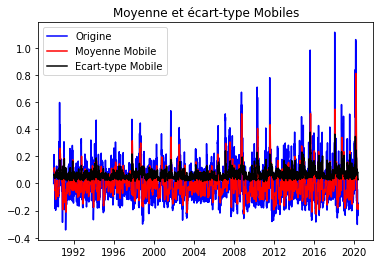

Statistiques ADF : -15.452775803043936
p-value : 2.770206345718482e-28
Valeurs Critiques :
	1%: -3.431204650438664
	5%: -2.8619176919072746
	10%: -2.566971040893343


In [73]:
rolling_mean_exp_decay = vix_data_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
vix_data_log_exp_decay = vix_data_log - rolling_mean_exp_decay
vix_data_log_exp_decay.dropna(inplace=True)
get_stationarity(vix_data_log_exp_decay)

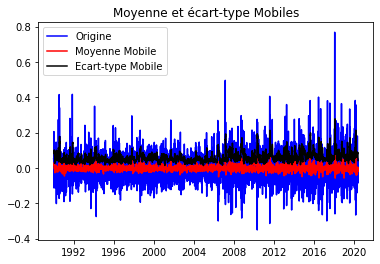

Statistiques ADF : -30.50985989383761
p-value : 0.0
Valeurs Critiques :
	1%: -3.4312045387551517
	5%: -2.8619176425585677
	10%: -2.5669710146243903


In [74]:
vix_data_log_shift = vix_data_log - vix_data_log.shift()
vix_data_log_shift.dropna(inplace=True)
get_stationarity(vix_data_log_shift)

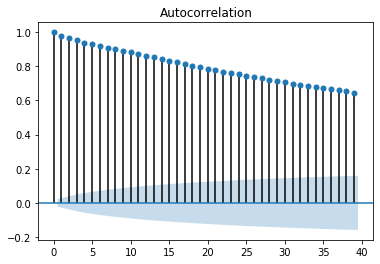

In [92]:
plot_acf(vix_data)
pyplot.show()

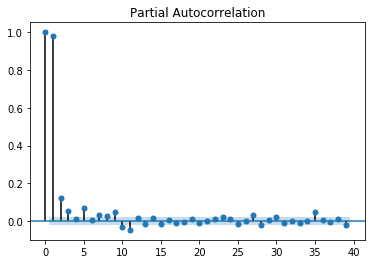

In [91]:
plot_pacf(vix_data)
pyplot.show()

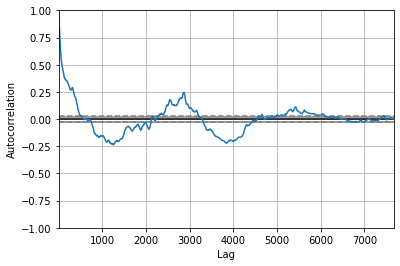

In [157]:
autocorrelation_plot(vix_data)
#pyplot.xlim(0, 1000)
pyplot.show()

In [95]:
vix_data_shift = vix_data - vix_data.shift()
vix_data_shift.dropna(inplace=True)

In [96]:
vix_data_shift

,Close
Date,
1990-01-03,0.950001
1990-01-04,1.029998
1990-01-05,0.890002
1990-01-08,0.149999
1990-01-09,1.940001
...,...
2020-06-01,0.720000
2020-06-02,-1.390000
2020-06-03,-1.180000


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 7666
Model:                ARIMA(10, 1, 0)   Log Likelihood              -14471.724
Method:                       css-mle   S.D. of innovations              1.598
Date:                Sat, 06 Jun 2020   AIC                          28967.449
Time:                        22:05:28   BIC                          29050.783
Sample:                             1   HQIC                         28996.034
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0010      0.013      0.073      0.942      -0.025       0.027
ar.L1.D.Close     -0.1462      0.011    -12.812      0.000      -0.169      -0.124
ar.L2.D.Close     -0.0691      0.012

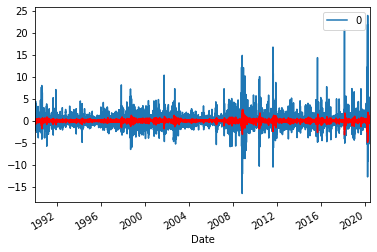

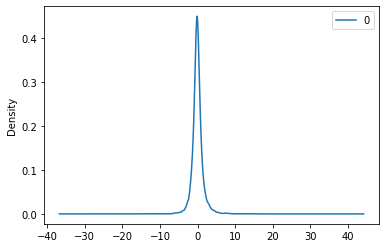

                 0
count  7666.000000
mean      0.000089
std       1.598245
min     -16.517447
25%      -0.663158
50%      -0.087394
75%       0.535178
max      23.931529
Date
1990-01-03    0.000955
1990-01-04   -0.124449
1990-01-05   -0.199124
1990-01-08   -0.206408
1990-01-09   -0.180493
                ...   
2020-06-01    0.000345
2020-06-02    0.015688
2020-06-03    0.074835
2020-06-04    0.347055
2020-06-05    0.061747
Length: 7666, dtype: float64


In [162]:
model = ARIMA(vix_data, order=(10,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.plot(model_fit.fittedvalues, color='red')
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [1]:
predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_log = pd.Series(vix_data['Close'].iloc[0], index=vix_data.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(vix_data)
plt.plot(predictions_ARIMA)

NameError: name 'pd' is not defined

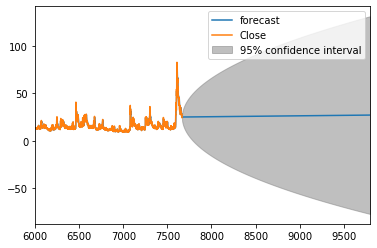

In [169]:
fig = model_fit.plot_predict(6000,9800)